# Proyecto Módulo 2

## Precio Umbral

## Portafolio de inversiones

### Nombres
- Juan Pablo Domínguez
- 733982 - Daniel Pastrana - daniel.pastrana@iteso.mx
- Rodolfo Magdaleno

### 20/04/2023

### Objetivo General:
Crear un portafolio de inversiones que satisfaga los requerimientos del inversionista y ayudarle a decidir en cuál empresa invertir más dinero.

### Objetivos específicos:
- Escoger tres empresas con giros diferentes que coticen en la BMV mexicana.
- Utilizar los aprendizajes adquiridos en el tema de Probabilidad - Precio Umbral.
- Analizar los datos y las gráficas resultantes para poder dar una respuesta.

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Describimos una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *yfinance*.

In [4]:
def getClose(names, start, end) :
    return yf.download(names, start = start, end = end)["Adj Close"]

#### Para que el portafolio tuviera acciones diversas, escogimos acciones de empresas diferentes entre sí. Decidimos usar las acciones de CEMEX, Bimbo y Walmart

In [5]:
data_cemex = getClose("CEMEXCPO.MX", "2022-01-01", "2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [6]:
data_bimbo = getClose("BIMBOA.MX", "2022-01-01", "2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [7]:
data_walmart = getClose("WALMEX.MX", "2022-01-01", "2022-12-31")

[*********************100%***********************]  1 of 1 completed


#### Graficamos los precios de cierre ajustados de cada empresa en un histograma

<AxesSubplot:ylabel='Frequency'>

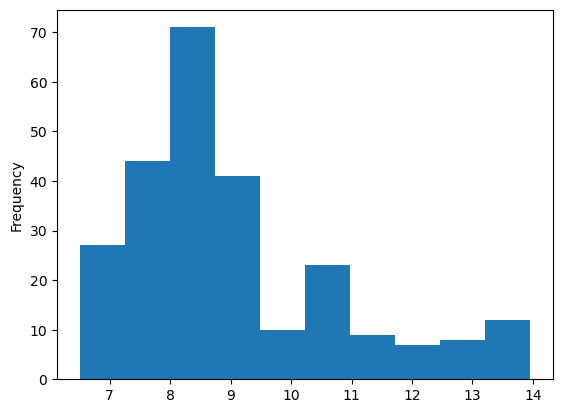

In [8]:
data_cemex.plot.hist()

<AxesSubplot:ylabel='Frequency'>

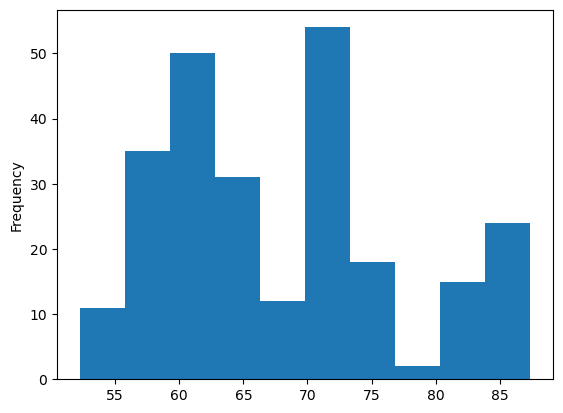

In [9]:
data_bimbo.plot.hist()

<AxesSubplot:ylabel='Frequency'>

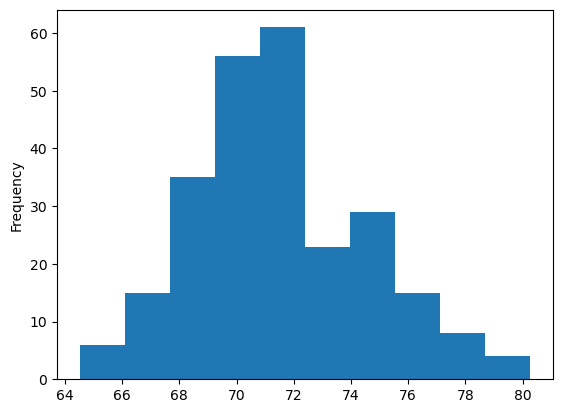

In [10]:
data_walmart.plot.hist()

#### Calculamos el rendimiento simple y logarítmico de cada empresa, y al suponer que son variables aleatorias con una distribución normal, decidimos representarlos con un histograma

<AxesSubplot:ylabel='Frequency'>

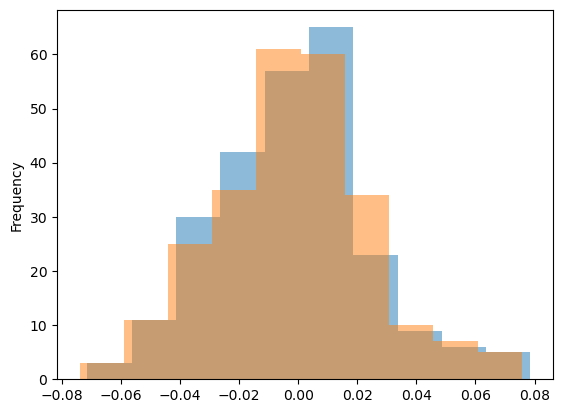

In [11]:
R_cemex = (data_cemex - data_cemex.shift())/data_cemex.shift()
r_cemex = np.log(data_cemex/data_cemex.shift())
R_cemex.plot.hist(alpha = 0.5)
r_cemex.plot.hist(alpha = 0.5)

<AxesSubplot:ylabel='Frequency'>

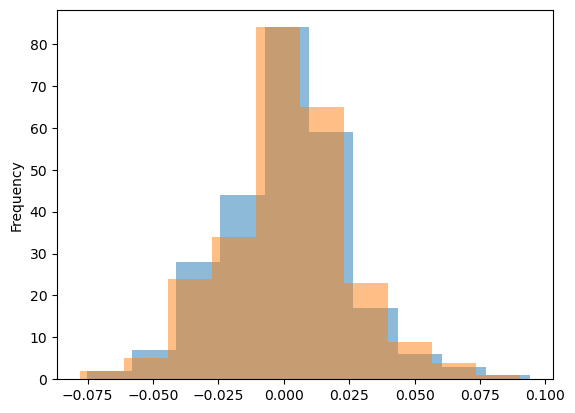

In [12]:
R_bimbo = (data_bimbo - data_bimbo.shift())/data_bimbo.shift()
r_bimbo = np.log(data_bimbo/data_bimbo.shift())
R_bimbo.plot.hist(alpha = 0.5)
r_bimbo.plot.hist(alpha = 0.5)

<AxesSubplot:ylabel='Frequency'>

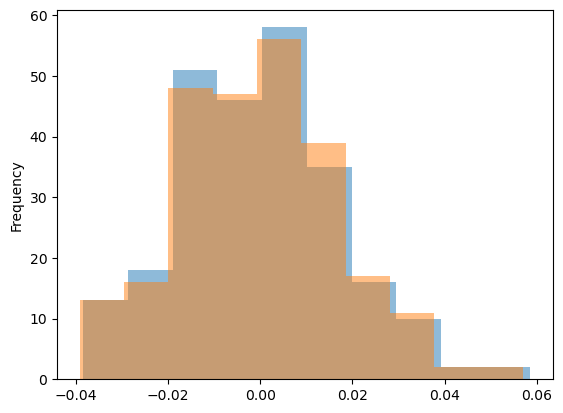

In [13]:
R_walmart = (data_walmart - data_walmart.shift())/data_walmart.shift()
r_walmart = np.log(data_walmart/data_walmart.shift())
R_walmart.plot.hist(alpha = 0.5)
r_walmart.plot.hist(alpha = 0.5)

#### Obtenemos la media y la desviación estándar de los rendimientos simples de cada empresa, para después guardar cada una en una variable diferente

In [14]:
R_cemex.describe()

count    251.000000
mean      -0.001863
std        0.026182
min       -0.071319
25%       -0.018211
50%       -0.001370
75%        0.013601
max        0.078616
Name: Adj Close, dtype: float64

In [15]:
R_bimbo.describe()

count    251.000000
mean       0.001452
std        0.023687
min       -0.075123
25%       -0.011177
50%        0.001656
75%        0.016074
max        0.094323
Name: Adj Close, dtype: float64

In [16]:
R_walmart.describe()

count    251.000000
mean      -0.000097
std        0.017305
min       -0.038426
25%       -0.011812
50%        0.000000
75%        0.010294
max        0.058627
Name: Adj Close, dtype: float64

In [17]:
R_cemex_mean = R_cemex.mean()
R_cemex_std = R_cemex.std()

R_bimbo_mean = R_bimbo.mean()
R_bimbo_std = R_bimbo.std()

R_walmart_mean = R_walmart.mean()
R_walmart_std = R_walmart.std()

#### Escribimos una función que regrese en un DataFrame de pandas para cada empresa, dando como argumentos la media, la desviación estandar, la fecha de inicio, la fecha del fin de simulación y el número de escenarios a simular, que en este caso decidimos que fueran 10000

In [18]:
def sim_r_cemex(media, std, inicio, end, N) :
    m = 365
    r_cemex = np.random.normal(media, std, size = (m, N))
    fechas_cemex = pd.date_range(inicio, end)
    return pd.DataFrame(index = fechas_cemex, data = r_cemex)

In [19]:
def sim_r_bimbo(media, std, inicio, end, N) :
    m = 365
    r_bimbo = np.random.normal(media, std, size = (m, N))
    fechas_bimbo = pd.date_range(inicio, end)
    return pd.DataFrame(index = fechas_bimbo, data = r_bimbo)

In [20]:
def sim_r_walmart(media, std, inicio, end, N) :
    m = 365
    r_walmart = np.random.normal(media, std, size = (m, N))
    fechas_walmart = pd.date_range(inicio, end)
    return pd.DataFrame(index = fechas_walmart, data = r_walmart)

In [21]:
r_simulados_cemex = sim_r_cemex(R_cemex_mean, R_cemex_std, "2023-01-01", "2023-12-31", 10000)
r_simulados_bimbo = sim_r_bimbo(R_bimbo_mean, R_bimbo_std, "2023-01-01", "2023-12-31", 10000)
r_simulados_walmart = sim_r_walmart(R_walmart_mean, R_walmart_std, "2023-01-01", "2023-12-31", 10000)

#### Simulamos los 10000 escenarios de rendimientos de cada empresa del 01 de enero de 2023 al 31 de diciembre de 2023

In [22]:
rendimientos_simulados_cemex = (r_simulados_cemex + 1).cumprod()
rendimientos_simulados_cemex

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,0.983687,0.987759,0.978194,0.978891,1.020672,0.959713,0.987561,0.981149,1.042125,1.002223,...,0.965279,1.019008,1.033543,1.026040,0.951663,0.978857,1.044964,0.970868,0.973396,0.982770
2023-01-02,0.988931,0.976267,0.958736,0.983460,1.080301,0.931993,0.981588,0.991091,1.033681,1.063746,...,0.930766,1.018075,1.018316,1.046031,0.958246,0.983237,0.994640,0.941238,0.992153,0.974654
2023-01-03,0.977945,0.931931,0.933804,0.983826,1.098288,0.903468,0.954279,0.965147,1.037158,1.045523,...,0.940689,1.003671,0.997527,1.063723,0.987750,0.985973,0.997431,0.953503,0.956595,0.956364
2023-01-04,0.984482,0.905657,0.915647,0.934303,1.120609,0.887545,0.993182,0.981541,1.042494,1.035477,...,0.912597,1.020832,0.942609,1.090694,0.995582,0.976273,0.998915,0.957261,0.960873,0.938335
2023-01-05,0.957060,0.890611,0.929396,0.934081,1.101511,0.917020,0.990782,0.960589,1.043299,1.022410,...,0.922351,1.036103,0.898562,1.105012,0.964287,0.969901,0.999125,0.957053,0.892749,0.909268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.263936,0.257744,0.529035,0.528676,0.447598,0.307135,0.532601,1.798957,0.723875,0.814664,...,0.478661,0.308326,0.243230,0.391882,0.769548,0.269283,0.312126,0.636551,0.519189,0.148080
2023-12-28,0.281663,0.254990,0.535095,0.540805,0.456907,0.312473,0.499474,1.834888,0.689358,0.826591,...,0.476882,0.300925,0.241330,0.382987,0.763243,0.270226,0.328994,0.643381,0.517941,0.148270
2023-12-29,0.283201,0.257836,0.552866,0.525675,0.446453,0.306521,0.489428,1.787269,0.663212,0.827459,...,0.473919,0.299059,0.241153,0.371979,0.766889,0.267801,0.333054,0.633356,0.507139,0.149050
2023-12-30,0.273177,0.259307,0.563331,0.538193,0.434237,0.307601,0.524720,1.681887,0.658483,0.847211,...,0.478425,0.291457,0.242659,0.383583,0.759446,0.266570,0.332382,0.620371,0.493499,0.144981


In [23]:
rendimientos_simulados_bimbo = (r_simulados_bimbo + 1).cumprod()
rendimientos_simulados_bimbo

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,1.010736,1.002234,0.972961,0.989987,1.008765,1.018534,0.973614,1.001052,0.997982,0.986683,...,1.017912,1.014562,0.934927,1.043673,0.959290,0.992658,0.985819,0.996185,0.999829,1.007111
2023-01-02,1.042148,1.037296,1.036332,0.999928,0.967707,1.027497,0.979233,1.025630,1.015527,0.989228,...,1.008479,1.035154,0.944521,0.995616,0.958333,1.017883,0.966493,0.999222,0.990245,1.000068
2023-01-03,1.051060,1.054385,1.009073,1.047205,0.956613,0.986769,1.040339,1.012048,1.052646,1.000625,...,1.015262,1.015510,0.943529,1.044484,0.973898,1.046199,0.993451,1.036273,0.967310,1.009065
2023-01-04,1.071654,1.080132,1.017831,1.049486,0.983932,1.031921,1.058133,1.036628,1.035119,0.979062,...,1.018030,1.007027,0.898936,1.031592,0.961221,1.023090,1.010672,1.062921,0.985181,0.939469
2023-01-05,1.038849,1.114475,1.058638,1.061749,0.986869,0.968581,1.023586,1.038635,1.037982,0.969242,...,1.049440,1.000096,0.956018,1.052726,0.987205,1.023732,1.061615,1.048305,0.989900,0.936206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,1.568219,2.626890,1.739350,0.598126,0.689966,1.813645,2.044960,1.552352,2.433284,1.027674,...,1.921952,5.571939,1.828506,1.878667,2.819105,1.972219,2.579824,1.836250,1.742569,3.608718
2023-12-28,1.567176,2.605368,1.693557,0.601189,0.701870,1.856606,2.030628,1.535340,2.390457,1.075949,...,1.922194,5.591645,1.880045,1.847931,2.841136,1.983899,2.560563,1.816180,1.778752,3.590530
2023-12-29,1.543096,2.642662,1.707053,0.605380,0.700927,1.890258,2.069270,1.523411,2.313617,1.108709,...,1.871289,5.523759,1.855197,1.822796,2.939067,1.944387,2.582440,1.852999,1.740320,3.662269
2023-12-30,1.510862,2.636459,1.737175,0.609634,0.657479,1.896594,1.999102,1.507619,2.403175,1.146850,...,1.880615,5.595740,1.826090,1.751996,2.942988,2.019194,2.598412,1.809139,1.765385,3.734025


In [24]:
rendimientos_simulados_walmart = (r_simulados_walmart + 1).cumprod()
rendimientos_simulados_walmart

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,0.951743,0.981292,0.966656,1.032537,0.991130,0.999820,0.984655,1.044899,1.004776,1.006560,...,0.984549,1.010500,1.010875,0.998091,0.985191,0.999389,1.003671,1.010904,0.992892,0.990934
2023-01-02,0.954120,0.969730,0.980551,1.029141,0.999441,1.011913,0.990268,1.018638,1.026221,1.014180,...,0.971352,1.016295,1.002699,0.997459,0.999678,0.993654,0.997772,0.996133,0.985071,1.002072
2023-01-03,0.972299,0.920952,0.989582,1.013946,1.015436,1.004171,0.965717,0.999249,1.005124,1.000681,...,0.950021,0.996957,1.019778,1.022691,1.016421,0.971849,1.002191,0.996371,0.973045,1.006352
2023-01-04,0.976535,0.937189,0.978380,0.998000,0.984693,0.996986,0.991908,1.020525,0.973099,0.998315,...,0.955201,1.006536,1.006924,1.017578,1.020442,0.965132,1.017676,1.002938,0.990576,0.994554
2023-01-05,0.969748,0.901895,0.983162,0.985439,1.020072,1.002151,1.001438,1.011635,0.989085,1.002608,...,0.948236,0.997822,1.001378,1.015612,1.037998,0.975798,1.007024,0.986761,0.997251,0.984886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,1.593438,0.516297,1.998994,1.547887,1.671361,0.835404,0.812742,0.822149,0.588885,1.319847,...,0.680882,2.042456,1.380069,0.877644,1.767125,1.414211,0.837707,1.104718,1.038826,0.509584
2023-12-28,1.599115,0.521504,2.060942,1.555776,1.749818,0.868315,0.825746,0.829316,0.575167,1.287426,...,0.668776,2.027475,1.362382,0.879631,1.780880,1.384872,0.833215,1.105143,1.038670,0.503038
2023-12-29,1.618599,0.513389,2.120424,1.528811,1.759909,0.855319,0.841277,0.814710,0.563029,1.286269,...,0.658684,2.047680,1.356137,0.905058,1.805356,1.420078,0.828901,1.124301,1.032026,0.489320
2023-12-30,1.632281,0.528480,2.104746,1.535935,1.813113,0.858336,0.844884,0.815170,0.557036,1.297903,...,0.673346,2.042377,1.385513,0.908498,1.810004,1.396184,0.811569,1.125488,1.024413,0.501274


#### Con los rendimientos simulados encontramos los precios al cierre proyectados para cada empresa en todo el año simulado

In [25]:
precios_simulados_cemex = rendimientos_simulados_cemex * data_cemex[-1]
precios_simulados_cemex

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,7.790798,7.823051,7.747295,7.752817,8.083724,7.600924,7.821480,7.770702,8.253630,7.937605,...,7.645008,8.070543,8.185664,8.126236,7.537174,7.752544,8.276115,7.689276,7.709299,7.783541
2023-01-02,7.832331,7.732036,7.593190,7.789001,8.555986,7.381387,7.774178,7.849440,8.186757,8.424865,...,7.371669,8.063157,8.065064,8.284562,7.589309,7.787236,7.877548,7.454603,7.857849,7.719259
2023-01-03,7.745327,7.380891,7.395725,7.791903,8.698440,7.155468,7.557886,7.643968,8.214290,8.280543,...,7.450257,7.949076,7.900415,8.424686,7.822976,7.808910,7.899651,7.551745,7.576236,7.574405
2023-01-04,7.797096,7.172802,7.251925,7.399679,8.875220,7.029358,7.865999,7.773807,8.256555,8.200975,...,7.227767,8.084988,7.465467,8.638300,7.885007,7.732081,7.911403,7.581506,7.610114,7.431615
2023-01-05,7.579914,7.053642,7.360813,7.397920,8.723970,7.262798,7.846994,7.607869,8.262930,8.097484,...,7.305023,8.205934,7.116607,8.751693,7.637152,7.681616,7.913071,7.579859,7.070570,7.201399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,2.090376,2.041335,4.189954,4.187114,3.544976,2.432512,4.218201,14.247737,5.733092,6.452135,...,3.790998,2.441940,1.926384,3.103704,6.094821,2.132721,2.472039,5.041480,4.111978,1.172791
2023-12-28,2.230770,2.019523,4.237949,4.283173,3.618700,2.474785,3.955833,14.532310,5.459713,6.546603,...,3.776908,2.383329,1.911333,3.033254,6.044881,2.140189,2.605631,5.095576,4.102093,1.174297
2023-12-29,2.242954,2.042059,4.378699,4.163343,3.535911,2.427646,3.876273,14.155171,5.252641,6.553474,...,3.753436,2.368547,1.909933,2.946076,6.073758,2.120988,2.637791,5.016179,4.016541,1.180477
2023-12-30,2.163562,2.053710,4.461584,4.262490,3.439156,2.436198,4.155786,13.320547,5.215188,6.709908,...,3.789125,2.308341,1.921863,3.037977,6.014810,2.111237,2.632463,4.913341,3.908516,1.148250


In [26]:
precios_simulados_bimbo = rendimientos_simulados_bimbo * data_bimbo[-1]
precios_simulados_bimbo

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,83.183535,82.483825,80.074685,81.475960,83.021374,83.825347,80.128475,82.386595,82.133890,81.204053,...,83.774127,83.498437,76.944482,85.894321,78.949601,81.695772,81.132900,81.986038,82.285894,82.885240
2023-01-02,85.768808,85.369430,85.290109,82.294109,79.642265,84.562999,80.590853,84.409335,83.577897,81.413436,...,82.997797,85.193190,77.734104,81.939176,78.870791,83.771764,79.542379,82.236015,81.497204,82.305579
2023-01-03,86.502259,86.775919,83.046694,86.184934,78.729232,81.211069,85.619879,83.291568,86.632771,82.351400,...,83.556057,83.576511,77.652415,85.961007,80.151780,86.102160,81.761057,85.285309,79.609603,83.046074
2023-01-04,88.197165,88.894902,83.767486,86.372698,80.977625,84.927107,87.084343,85.314467,85.190281,80.576821,...,83.783898,82.878327,73.982449,84.900048,79.108458,84.200350,83.178347,87.478381,81.080427,77.318333
2023-01-05,85.497249,91.721293,87.125945,87.381971,81.219328,79.714222,84.241112,85.479669,85.425925,79.768613,...,86.368878,82.307897,78.680252,86.639329,81.246952,84.253172,87.370935,86.275511,81.468739,77.049730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,129.064387,216.193033,143.148504,49.225773,56.784196,149.263024,168.300242,127.758593,200.259271,84.577555,...,158.176657,458.570630,150.486084,154.614316,232.012345,162.313598,212.319506,151.123398,143.413457,296.997484
2023-12-28,128.978614,214.421828,139.379741,49.477865,57.763868,152.798692,167.120681,126.358462,196.734646,88.550607,...,158.196590,460.192414,154.727718,152.084743,233.825484,163.274912,210.734376,149.471618,146.391267,295.500661
2023-12-29,126.996827,217.491104,140.490437,49.822767,57.686301,155.568252,170.300902,125.376696,190.410665,91.246738,...,154.007058,454.605371,152.682678,150.016110,241.885211,160.023038,212.534848,152.501795,143.228317,301.404755
2023-12-30,124.343934,216.980617,142.969472,50.172883,54.110522,156.089709,164.526102,124.077022,197.781269,94.385749,...,154.774580,460.529412,150.287190,144.189259,242.207949,166.179706,213.849289,148.892186,145.291197,307.310247


In [27]:
precios_simulados_walmart = rendimientos_simulados_walmart * data_walmart[-1]
precios_simulados_walmart

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,64.869046,66.883069,65.885525,70.375842,67.553646,68.145927,67.112275,71.218419,68.483690,68.605276,...,67.105075,68.873872,68.899419,68.028054,67.148801,68.116559,68.408382,68.901386,67.673743,67.540284
2023-01-02,65.031083,66.095014,66.832602,70.144376,68.120121,68.970137,67.494904,69.428533,69.945365,69.124697,...,66.205561,69.268856,68.342177,67.985023,68.136256,67.725623,68.006306,67.894647,67.140676,68.299417
2023-01-03,66.270167,62.770404,67.448089,69.108733,69.210265,68.442452,65.821546,68.107025,68.507411,68.204590,...,64.751740,67.950764,69.506202,69.704752,69.277397,66.239445,68.307553,67.910841,66.320985,68.591140
2023-01-04,66.558833,63.877083,66.684626,68.021879,67.114896,67.952747,67.606647,69.557152,66.324664,68.043375,...,65.104757,68.603700,68.630129,69.356282,69.551507,65.781682,69.362952,68.358437,67.515868,67.787032
2023-01-05,66.096238,61.471562,67.010550,67.165737,69.526286,68.304802,68.256202,68.951198,67.414225,68.335974,...,64.630056,68.009721,68.252104,69.222302,70.748049,66.508615,68.636916,67.255856,67.970844,67.128039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,108.605880,35.189842,136.247798,105.501159,113.916936,56.939649,55.394994,56.036199,40.137305,89.958346,...,46.407663,139.210069,94.062995,59.818622,120.444063,96.390076,57.096582,75.295560,70.804497,34.732322
2023-12-28,108.992780,35.544753,140.470102,106.038848,119.264436,59.182772,56.281359,56.524658,39.202351,87.748627,...,45.582565,138.189055,92.857495,59.954053,121.381542,94.390367,56.790439,75.324540,70.793857,34.286186
2023-12-29,110.320789,34.991667,144.524226,104.200989,119.952222,58.296971,57.339946,55.529133,38.375070,87.669770,...,44.894739,139.566145,92.431828,61.687120,123.049825,96.789940,56.496377,76.630332,70.341015,33.351163
2023-12-30,111.253312,36.020242,143.455688,104.686518,123.578508,58.502629,57.585794,55.560525,37.966591,88.462722,...,45.894075,139.204705,94.434026,61.921555,123.366586,95.161362,55.315073,76.711192,69.822132,34.165932


#### Con una gráfica mostramos las probabilidades de cada empresa de tener un retorno del 20% 

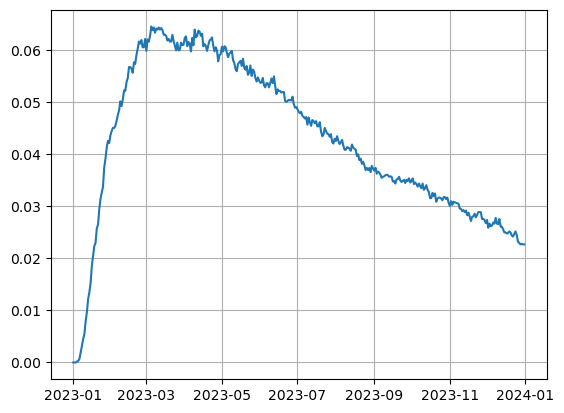

In [28]:
valor_deseado_cemex = data_cemex[-1]*1.20
probabilidad_cemex = (precios_simulados_cemex >= valor_deseado_cemex).mean(axis = 1)
plt.figure()
plt.plot(probabilidad_cemex)
plt.grid()

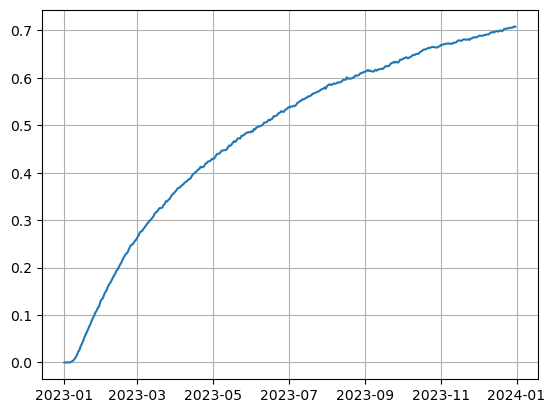

In [29]:
valor_deseado_bimbo = data_bimbo[-1]*1.20
probabilidad_bimbo = (precios_simulados_bimbo >= valor_deseado_bimbo).mean(axis = 1)
plt.figure()
plt.plot(probabilidad_bimbo)
plt.grid()

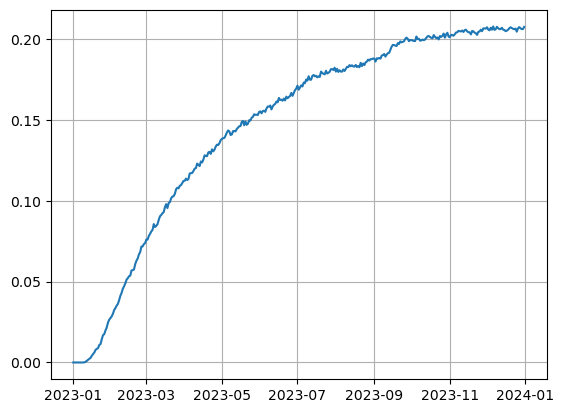

In [30]:
valor_deseado_walmart = data_walmart[-1]*1.20
probabilidad_walmart = (precios_simulados_walmart >= valor_deseado_walmart).mean(axis = 1)
plt.figure()
plt.plot(probabilidad_walmart)
plt.grid()

#### Al comparar las gráficas podemos darnos cuenta que la acción de Bimbo es la que más probabilidad tiene de que el retorno sea del 20%

#### Ahora vamos a ver si cambian los datos que resultaron utilizando el rendimiento logarítmico

In [31]:
r_cemex.describe()

count    251.000000
mean      -0.002206
std        0.026188
min       -0.073990
25%       -0.018379
50%       -0.001371
75%        0.013510
max        0.075679
Name: Adj Close, dtype: float64

In [32]:
r_bimbo.describe()

count    251.000000
mean       0.001173
std        0.023645
min       -0.078094
25%       -0.011240
50%        0.001655
75%        0.015946
max        0.090136
Name: Adj Close, dtype: float64

In [33]:
r_walmart.describe()

count    251.000000
mean      -0.000246
std        0.017257
min       -0.039184
25%       -0.011882
50%        0.000000
75%        0.010242
max        0.056973
Name: Adj Close, dtype: float64

#### Hacemos el mismo proceso ahora con los nuevos datos surgidos del rendimiento logarítmico

In [34]:
r_cemex_mean = r_cemex.mean()
r_cemex_std = r_cemex.std()

r_bimbo_mean = r_bimbo.mean()
r_bimbo_std = r_bimbo.std()

r_walmart_mean = r_walmart.mean()
r_walmart_std = r_walmart.std()

In [35]:
def sim_r_cemex_log(media, std, inicio, end, N) :
    m = 365
    r_cemex_log = np.random.normal(media, std, size = (m, N))
    fechas_cemex_log = pd.date_range(inicio, end)
    return pd.DataFrame(index = fechas_cemex_log, data = r_cemex_log)

In [36]:
def sim_r_bimbo_log(media, std, inicio, end, N) :
    m = 365
    r_bimbo_log = np.random.normal(media, std, size = (m, N))
    fechas_bimbo_log = pd.date_range(inicio, end)
    return pd.DataFrame(index = fechas_bimbo_log, data = r_bimbo_log)

In [37]:
def sim_r_walmart_log(media, std, inicio, end, N) :
    m = 365
    r_walmart_log = np.random.normal(media, std, size = (m, N))
    fechas_walmart_log = pd.date_range(inicio, end)
    return pd.DataFrame(index = fechas_walmart_log, data = r_walmart_log)

In [38]:
r_simulados_cemex_log = sim_r_cemex_log(r_cemex_mean, r_cemex_std, "2023-01-01", "2023-12-31", 10000)
r_simulados_bimbo_log = sim_r_bimbo_log(r_bimbo_mean, r_bimbo_std, "2023-01-01", "2023-12-31", 10000)
r_simulados_walmart_log = sim_r_walmart_log(r_walmart_mean, r_walmart_std, "2023-01-01", "2023-12-31", 10000)

In [39]:
rendimientos_simulados_cemex_log = (r_simulados_cemex_log + 1).cumprod()
rendimientos_simulados_cemex_log

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,1.014337,1.010989,0.997334,0.998188,1.012269,0.999771,0.990255,0.990810,1.003007,0.980921,...,1.014135,1.031973,0.978123,1.012357,1.002109,1.004835,1.011351,0.971331,0.999842,1.015993
2023-01-02,1.049566,0.997824,1.003484,0.959341,1.048500,1.026750,1.000714,1.036769,1.020212,1.012478,...,1.003423,0.926843,0.956182,1.015443,0.999710,0.961825,1.022848,0.972456,0.983850,1.058906
2023-01-03,1.063259,1.024787,1.002432,0.967512,1.046280,1.059332,1.012780,1.006914,1.008617,0.998110,...,0.963247,0.979942,0.974922,1.047403,1.009775,0.937663,1.063687,0.982300,0.987078,1.086276
2023-01-04,1.040622,1.025424,0.949209,0.970571,1.058718,1.016289,1.021084,1.033560,0.975010,1.020531,...,0.953635,0.978249,0.974440,1.026784,0.991174,0.921723,1.048931,0.938099,0.980280,1.072334
2023-01-05,1.091400,1.051813,0.920832,0.980527,1.092076,1.014546,1.009223,1.057861,0.920369,1.003162,...,0.966892,0.956140,0.979356,1.063230,0.958491,0.918257,0.976335,0.990334,0.987017,1.022781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.387748,0.312572,0.798996,0.232127,0.518873,0.529901,0.249237,0.317052,0.283277,0.375596,...,0.154868,0.384197,0.472982,0.381547,0.324087,0.315804,0.564253,0.607646,0.334604,0.562251
2023-12-28,0.386762,0.303322,0.757814,0.239549,0.510514,0.529794,0.251390,0.313154,0.277404,0.371248,...,0.157582,0.394060,0.478484,0.385969,0.320307,0.320782,0.549576,0.595764,0.318225,0.559662
2023-12-29,0.399383,0.301654,0.767108,0.245615,0.506764,0.542818,0.256928,0.300022,0.275717,0.373077,...,0.162862,0.404565,0.457391,0.392081,0.313486,0.321235,0.561285,0.590248,0.328169,0.561962
2023-12-30,0.398361,0.303099,0.760768,0.241509,0.526943,0.547873,0.258082,0.309686,0.276348,0.363400,...,0.168660,0.400887,0.483497,0.382111,0.306142,0.323160,0.557023,0.578274,0.326934,0.574415


In [40]:
rendimientos_simulados_bimbo_log = (r_simulados_bimbo_log + 1).cumprod()
rendimientos_simulados_bimbo_log

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,1.030668,1.018340,1.010194,1.019389,0.966035,1.039178,1.011236,0.990924,0.958508,1.030049,...,1.005757,0.996514,1.024516,1.003838,1.003461,0.957844,0.999804,0.971500,1.011820,1.044060
2023-01-02,1.026970,1.000969,1.047969,1.026877,1.005485,1.046195,1.038389,0.994243,0.941734,1.059607,...,0.984779,0.979203,0.976178,1.001653,0.995954,0.932747,0.984659,0.936764,1.010310,1.026204
2023-01-03,1.032502,0.957710,1.063233,1.036791,0.976512,1.078368,1.032970,0.988958,0.959535,1.025488,...,0.959581,1.011016,0.996153,0.992560,0.996457,0.900571,0.971455,0.947888,0.994155,1.063507
2023-01-04,1.015252,0.958403,1.051167,1.011513,0.994826,1.106731,1.057238,1.012131,1.005201,1.039553,...,0.929242,0.999679,1.000336,0.968761,1.044291,0.927441,0.985377,0.941602,1.003490,1.018768
2023-01-05,1.041206,0.947410,1.095239,1.017787,0.978979,1.061979,1.073842,0.986412,1.037697,1.032783,...,0.922561,1.002203,1.022977,0.960683,1.068607,0.925121,1.016452,0.958104,1.033731,0.987223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,2.747680,1.005607,1.195774,1.580526,1.120521,2.321959,1.687365,1.731100,1.521930,1.097815,...,0.736571,0.958726,2.067173,2.332740,1.253020,1.386933,1.348975,0.610842,0.919990,1.448952
2023-12-28,2.600290,1.021038,1.167015,1.560251,1.135023,2.354558,1.724270,1.786479,1.513582,1.097955,...,0.724506,0.943483,2.148766,2.275153,1.278950,1.352069,1.360932,0.612866,0.915954,1.421172
2023-12-29,2.622262,1.046993,1.169359,1.498844,1.206376,2.380962,1.695051,1.808487,1.551757,1.110893,...,0.716862,0.955645,2.154216,2.284466,1.295026,1.358024,1.376278,0.599438,0.900806,1.420990
2023-12-30,2.630688,1.055454,1.168978,1.525649,1.199188,2.366794,1.719265,1.817165,1.599554,1.068549,...,0.696857,0.915197,2.030420,2.283267,1.220963,1.333557,1.376497,0.586086,0.915182,1.428812


In [41]:
rendimientos_simulados_walmart_log = (r_simulados_walmart_log + 1).cumprod()
rendimientos_simulados_walmart_log

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,1.021024,1.011344,0.986808,1.016847,0.990892,1.034556,0.985094,1.019262,0.973529,0.992994,...,0.992610,1.017316,0.987270,1.003173,1.017302,1.004128,1.008699,0.999275,1.019329,1.011573
2023-01-02,1.016419,1.023109,0.995582,1.017584,0.998360,1.052218,0.971358,1.017295,0.977516,0.998366,...,0.972648,1.018607,0.989703,1.002405,1.035445,1.030165,0.979783,1.003944,1.043827,1.005407
2023-01-03,1.007187,0.998737,1.017518,1.000263,0.985476,1.051332,0.980980,1.046366,0.980162,0.995628,...,0.965192,1.030199,0.969813,0.980556,1.045687,1.030858,0.996232,1.001278,1.061642,1.021484
2023-01-04,1.021385,1.036609,1.027082,1.013967,1.004649,1.059159,0.984879,1.049655,1.003174,0.999124,...,0.983757,1.034459,0.938514,0.995878,1.058317,1.028972,1.016440,0.986992,1.079851,1.028023
2023-01-05,1.023419,1.017792,1.036961,1.013064,1.015463,1.066815,0.983549,1.036142,0.999560,0.997923,...,0.997568,1.051433,0.926081,1.002079,1.076220,1.037042,0.972231,0.999359,1.070984,0.991337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.754251,1.067557,1.396977,1.038724,1.375673,1.383123,0.707753,1.532520,0.795746,0.781459,...,1.391750,1.016601,0.545492,0.998979,0.541291,0.812982,0.879177,0.954733,1.013833,0.900489
2023-12-28,0.762452,1.065561,1.406974,1.028082,1.394083,1.403119,0.722934,1.521038,0.799364,0.786960,...,1.372912,1.009105,0.540294,0.995741,0.540887,0.812658,0.881557,0.957589,0.993885,0.895583
2023-12-29,0.751155,1.070307,1.386588,1.030657,1.416991,1.421049,0.722466,1.520553,0.789051,0.784987,...,1.404545,0.964103,0.520208,0.985908,0.548308,0.802912,0.856859,0.981143,1.028982,0.899753
2023-12-30,0.761216,1.099584,1.375104,1.047924,1.432487,1.379956,0.733638,1.533746,0.759387,0.784249,...,1.435089,0.982370,0.515695,0.970604,0.566343,0.789670,0.848660,0.980971,1.019773,0.930828


In [42]:
precios_simulados_cemex_log = rendimientos_simulados_cemex_log * data_cemex[-1]
precios_simulados_cemex_log

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,8.033551,8.007034,7.898885,7.905649,8.017171,7.918186,7.842817,7.847218,7.943819,7.768897,...,8.031949,8.173226,7.746734,8.017869,7.936701,7.958296,8.009899,7.692943,7.918746,8.046663
2023-01-02,8.312561,7.902769,7.947591,7.597982,8.304121,8.131861,7.925657,8.211210,8.080080,8.018829,...,7.947107,7.340593,7.572963,8.042309,7.917706,7.617654,8.100953,7.701854,7.792092,8.386536
2023-01-03,8.421008,8.116310,7.939259,7.662692,8.286534,8.389913,8.021216,7.974761,7.988246,7.905033,...,7.628915,7.761139,7.721380,8.295430,7.997422,7.426294,8.424397,7.779817,7.817659,8.603309
2023-01-04,8.241726,8.121362,7.517734,7.686922,8.385045,8.049010,8.086985,8.185794,7.722076,8.082609,...,7.552791,7.747732,7.717565,8.132129,7.850102,7.300048,8.307533,7.429743,7.763815,8.492887
2023-01-05,8.643890,8.330363,7.292987,7.765774,8.649241,8.035207,7.993045,8.378258,7.289322,7.945044,...,7.657785,7.572632,7.756500,8.420781,7.591249,7.272593,7.732575,7.843447,7.817178,8.100429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,3.070965,2.475570,6.328048,1.838443,4.109477,4.196818,1.973956,2.511053,2.243553,2.974718,...,1.226552,3.042844,3.746015,3.021855,2.566769,2.501171,4.468882,4.812555,2.650061,4.453029
2023-12-28,3.063152,2.402308,6.001886,1.897230,4.043270,4.195966,1.991012,2.480178,2.197041,2.940283,...,1.248046,3.120959,3.789596,3.056877,2.536833,2.540596,4.352645,4.718451,2.520339,4.432522
2023-12-29,3.163117,2.389103,6.075492,1.945272,4.013572,4.299119,2.034867,2.376175,2.183678,2.954773,...,1.289867,3.204152,3.622534,3.105279,2.482808,2.544179,4.445378,4.674764,2.599101,4.450736
2023-12-30,3.155018,2.400541,6.025280,1.912748,4.173391,4.339155,2.044011,2.452714,2.188672,2.878131,...,1.335791,3.175027,3.829295,3.026319,2.424642,2.559426,4.411624,4.579932,2.589320,4.549369


In [43]:
precios_simulados_bimbo_log = rendimientos_simulados_bimbo_log * data_bimbo[-1]
precios_simulados_bimbo_log

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,84.823998,83.809369,83.138958,83.895734,79.504694,85.524371,83.224744,81.553055,78.885184,84.773050,...,82.773829,82.013116,84.317707,82.615831,82.584839,78.830577,82.283843,79.954470,83.272821,85.926110
2023-01-02,84.519632,82.379734,86.247826,84.511977,82.751439,86.101835,85.459438,81.826225,77.504745,87.205694,...,81.047338,80.588431,80.339463,82.436079,81.967011,76.765046,81.037459,77.095693,83.148487,84.456632
2023-01-03,84.974919,78.819556,87.504048,85.327890,80.366951,88.749723,85.013464,81.391212,78.969759,84.397628,...,78.973523,83.206624,81.983363,81.687658,82.008413,74.116987,79.950723,78.011187,81.818940,87.526607
2023-01-04,83.555234,78.876557,86.511026,83.247486,81.874167,91.083951,87.010684,83.298400,82.728015,85.555193,...,76.476587,82.273565,82.327693,79.729066,85.945162,76.328361,81.096549,77.493820,82.587218,83.844602
2023-01-05,85.691244,77.971876,90.138149,83.763861,80.569972,87.400859,88.377202,81.181739,85.402494,84.998050,...,75.926794,82.481336,84.191051,79.064248,87.946388,76.137453,83.653987,78.851925,85.076065,81.248490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,226.134104,82.761464,98.412233,130.077278,92.218886,191.097192,138.870139,142.469516,125.254860,90.350160,...,60.619808,78.903130,170.128343,191.984497,103.123539,114.144565,111.020647,50.272283,75.715214,119.248713
2023-12-28,214.003894,84.031389,96.045319,128.408664,93.412432,193.780142,141.907426,147.027267,124.567775,90.361725,...,59.626884,77.648643,176.843458,187.245097,105.257615,111.275270,112.004744,50.438854,75.383016,116.962441
2023-12-29,215.812154,86.167519,96.238256,123.354827,99.284769,195.953195,139.502703,148.838447,127.709634,91.426530,...,58.997762,78.649591,177.291987,188.011562,106.580629,111.765362,113.267673,49.333735,74.136361,116.947516
2023-12-30,216.505666,86.863907,96.206887,125.560948,98.693175,194.787115,141.495490,149.552674,131.643282,87.941569,...,57.351295,75.320692,167.103576,187.912880,100.485293,109.751736,113.285717,48.234915,75.319493,117.591200


In [44]:
precios_simulados_walmart_log = rendimientos_simulados_walmart_log * data_walmart[-1]
precios_simulados_walmart_log

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2023-01-01,69.591145,68.931344,67.259016,69.306454,67.537411,70.513452,67.142222,69.471034,66.353954,67.680665,...,67.654523,69.338399,67.290534,68.374431,69.337465,68.439565,68.751074,68.108775,69.475604,68.947000
2023-01-02,69.277295,69.733257,67.857035,69.356667,68.046390,71.717293,66.205973,69.337011,66.625740,68.046840,...,66.293935,69.426390,67.456333,68.322090,70.574023,70.214188,66.780201,68.426981,71.145386,68.526714
2023-01-03,68.648009,68.072126,69.352197,68.176106,67.168266,71.656883,66.861809,71.318403,66.806088,67.860167,...,65.785706,70.216491,66.100668,66.832925,71.272163,70.261433,67.901349,68.245303,72.359573,69.622501
2023-01-04,69.615723,70.653404,70.004056,69.110176,68.475070,72.190365,67.127587,71.542569,68.374520,68.098491,...,67.051118,70.506875,63.967412,67.877224,72.132967,70.132890,69.278683,67.271616,73.600663,70.068173
2023-01-05,69.754392,69.370844,70.677386,69.048621,69.212089,72.712168,67.036948,70.621578,68.128222,68.016623,...,67.992422,71.663770,63.120036,68.299887,73.353223,70.682911,66.265513,68.114518,72.996326,67.567718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,51.408362,72.762730,95.215414,70.797535,93.763351,94.271176,48.239164,104.453806,54.236631,53.262837,...,94.859128,69.289654,37.179774,68.088569,36.893436,55.411365,59.923121,65.072894,69.100989,61.375679
2023-12-28,51.967342,72.626689,95.896816,70.072180,95.018170,95.634070,49.273850,103.671170,54.483176,53.637801,...,93.575168,68.778799,36.825475,67.867935,36.865880,55.389265,60.085314,65.267518,67.741401,61.041340
2023-12-29,51.197330,72.950167,94.507338,70.247718,96.579544,96.856098,49.241941,103.638144,53.780294,53.503320,...,95.731257,65.711484,35.456450,67.197710,37.371660,54.725004,58.401946,66.872913,70.133578,61.325531
2023-12-30,51.883087,74.945637,93.724628,71.424600,97.635694,94.055268,50.003444,104.537319,51.758469,53.452964,...,97.813069,66.956564,35.148858,66.154580,38.600887,53.822446,57.843148,66.861199,69.505871,63.443561


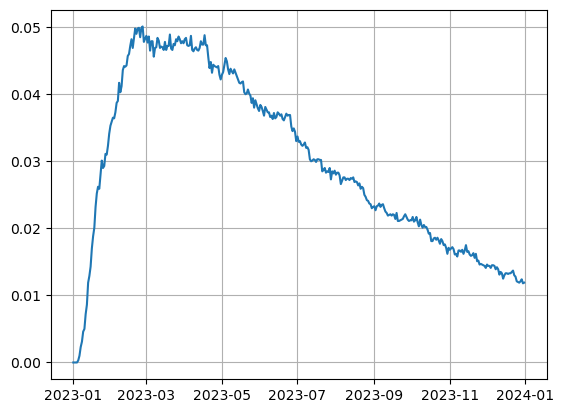

In [45]:
valor_deseado_cemex_log = data_cemex[-1]*1.20
probabilidad_cemex_log = (precios_simulados_cemex_log >= valor_deseado_cemex_log).mean(axis = 1)
plt.figure()
plt.plot(probabilidad_cemex_log)
plt.grid()

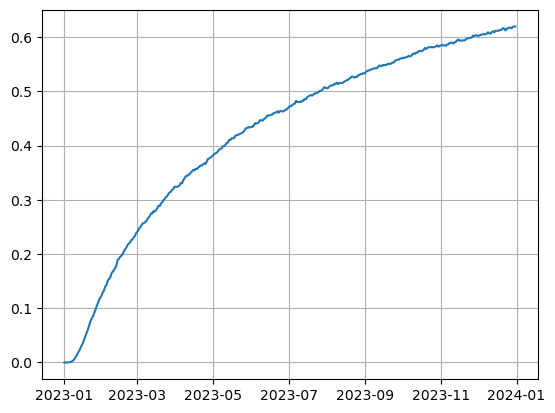

In [46]:
valor_deseado_bimbo_log = data_bimbo[-1]*1.20
probabilidad_bimbo_log = (precios_simulados_bimbo_log >= valor_deseado_bimbo_log).mean(axis = 1)
plt.figure()
plt.plot(probabilidad_bimbo_log)
plt.grid()

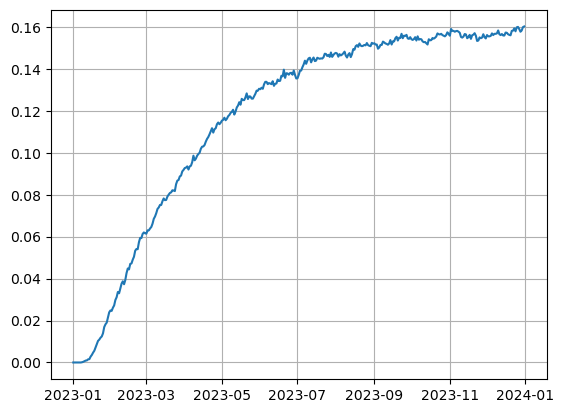

In [47]:
valor_deseado_walmart_log = data_walmart[-1]*1.20
probabilidad_walmart_log = (precios_simulados_walmart_log >= valor_deseado_walmart_log).mean(axis = 1)
plt.figure()
plt.plot(probabilidad_walmart_log)
plt.grid()

#### Los resultados son muy similares, y sigue siendo Bimbo la que más probabilidades tiene.

### Conclusiones:
 - Las probabilidades en las 3 empresas son más altas con el rendimiento simple que con el rendimiento logarítmico
 - En ambos tipos de rendimiento las tendencias de las gráficas de cada empresa son bastante similares.
 - 
 - 

### Referencias:
- Yahoo (n.d.). https://es.finance.yahoo.com/quote/CEMEXCPO.MX?p=CEMEXCPO.MX&.tsrc=fin-srch
- Yahoo (n.d.). https://es.finance.yahoo.com/quote/BIMBOA.MX?p=BIMBOA.MX&.tsrc=fin-srch
- Yahoo (n.d.). https://es.finance.yahoo.com/quote/WALMEX.MX?p=WALMEX.MX&.tsrc=fin-srch